* Load data 
* Reshape and plot
* Rescale 
* Fit a model 
* Test


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
import time

In [47]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("./train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
images.shape

(5000, 784)

In [3]:
images=data.iloc[0:5000,1:]
labels=data.iloc[0:5000,:1]
images[images>0]=1
train_images,test_images, train_labels, test_labels=train_test_split(images,labels,train_size=0.8,random_state=0)

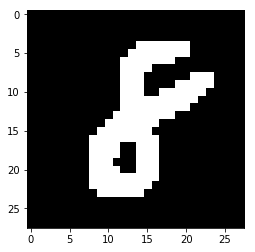

In [4]:
i=4001
image=images.iloc[i].as_matrix()
image=image.reshape((28,28))
plt.imshow(image,cmap='gray')

(array([ 635.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  149.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

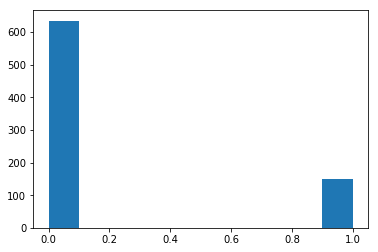

In [5]:
plt.hist(images.iloc[i])

In [6]:
clf=svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_labels)

0.88700000000000001

In [24]:
test=pd.read_csv("./test.csv")

In [57]:
%%time
test[test>0] =1 
predictions=pd.DataFrame(columns=['ImageId','Label'])
for i in range(test.shape[0]):
    pred=clf.predict(test.iloc[i].values)[0]
    predictions.loc[len(predictions)]=[i+1,pred]
print(len(predictions))

28000
CPU times: user 1min 55s, sys: 6.94 s, total: 2min 2s
Wall time: 2min 2s


In [49]:
%%time
pred=clf.predict(test.iloc[0].values)[0]

CPU times: user 3.62 ms, sys: 1.16 ms, total: 4.78 ms
Wall time: 3.39 ms


/Users/kireetiboorla/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [58]:
%%time
predictions.to_csv('output.csv',sep=',',columns=['ImageId','Label'],index=False)

CPU times: user 27.7 ms, sys: 2.42 ms, total: 30.2 ms
Wall time: 29.2 ms
